In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
from sklearn.linear_model import LogisticRegression

In [346]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [347]:
data = cancer['data']
data.shape

(569, 30)

In [348]:
feature_names = cancer['feature_names']
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [349]:
target = cancer['target']
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [350]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state=42)

In [352]:
lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [353]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.9577464788732394

In [354]:
y_pred_proba = lr.predict_proba(X_test)

y_pred_proba[:10]

array([[1.91659214e-01, 8.08340786e-01],
       [9.99999998e-01, 2.05338318e-09],
       [9.98426907e-01, 1.57309300e-03],
       [3.04468494e-03, 9.96955315e-01],
       [8.30740100e-04, 9.99169260e-01],
       [1.00000000e+00, 3.44492320e-10],
       [1.00000000e+00, 5.17717692e-13],
       [9.90181364e-01, 9.81863603e-03],
       [3.15634929e-03, 9.96843651e-01],
       [1.29171433e-02, 9.87082857e-01]])

In [355]:
def log_loss(predictions, y):
    return -np.sum(y*np.log2(predictions)+(1-y)*np.log2(1-predictions))/len(y)

In [356]:
# def get_error(pred, y):
#     return sum(pred != y) / len(y)

In [357]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [358]:
def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        lr = LogisticRegression(solver='lbfgs', max_iter=1000)
        lr.fit(X, y, sample_weight=w)

        predictions = lr.predict_proba(X_test)
        e = log_loss(predictions, y)
        # отбросим дерево, если его ошибка больше 0.5
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if e >= 1 - 1/n_classes: 
            break

        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - e) / e)

        # Найдем индексы правильно классифицированных элементов
        match = predictions == y

        # Увеличим веса для неправильно классифицированных элементов
        w[~match] *= np.exp(alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        models.append((alpha, lr))
    
    return models

In [359]:
N = 50

models = adaboost(X_train, y_train, N)

ValueError: operands could not be broadcast together with shapes (426,) (143,2) 

In [341]:
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, lr in models:
        prediction = lr.predict_proba(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - log_loss(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: nan


<ipython-input-336-025f1f51a0c4>:2: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(y*np.log2(predictions)+(1-y)*np.log2(1-predictions))/len(y)
<ipython-input-336-025f1f51a0c4>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y*np.log2(predictions)+(1-y)*np.log2(1-predictions))/len(y)


In [342]:
print(f'Точность алгоритма на тестовой выборке: {(1 - log_loss(predict(X_test, models), y_test)) * 100:.3f}')

Точность алгоритма на тестовой выборке: nan


<ipython-input-336-025f1f51a0c4>:2: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(y*np.log2(predictions)+(1-y)*np.log2(1-predictions))/len(y)
<ipython-input-336-025f1f51a0c4>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y*np.log2(predictions)+(1-y)*np.log2(1-predictions))/len(y)


In [343]:
train_errors = []
test_errors = []

for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors.append(get_error(predict(X_test, mods), y_test))

ValueError: operands could not be broadcast together with shapes (426,) (143,2) 

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

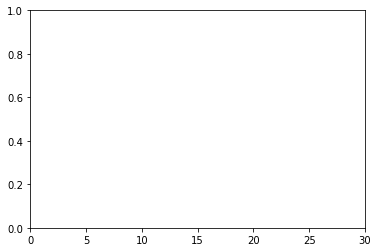

In [344]:
x = list(range(1, 31))

plt.xlim(0, 30)
plt.plot(x, train_errors, label='train errors')
plt.plot(x, test_errors, label='test errors')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')